# Data exploration

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nibabel as nib
from tqdm.notebook import tqdm

### Some custom functions

In [2]:
def read_training_data(data_path):
    '''Read training data'''
    imgs = []
    lbls = []
    for f in os.listdir(os.path.join(data_path, 'imagesTr')):
        if '.DS_Store' in f:
            continue
        imgs.append( nib.load(os.path.join(data_path, 'imagesTr', f)).get_fdata() )
        lbls.append( nib.load(os.path.join(data_path, 'labelsTr', f)).get_fdata() )
    return imgs, lbls

def read_testing_data(data_path):
    '''Read testing data'''
    imgs = []
    for f in os.listdir(os.path.join(data_path, 'imagesTs')):
        if '.DS_Store' in f:
            continue
        imgs.append( nib.load(os.path.join(data_path, 'imagesTs', f)).get_fdata() )
    return imgs

In [3]:
def scan_vox_size(path, img_type, file):
    scan_head = nib.load(os.path.join(data_path, img_type, file)).header
    return {file: list(scan_head.get_data_shape()) + list(scan_head.get_zooms()) }

### Read-in data

Read-in data from local folder and check dimensions

In [4]:
data_path = "ml4h_proj1_colon_cancer_ct/"
imgs, lbls = read_training_data(data_path)

In [5]:
print(len(imgs), len(lbls)) 

100 100


In [6]:
set([imgs[i].shape for i in range(len(imgs))])

{(512, 512, 37),
 (512, 512, 38),
 (512, 512, 41),
 (512, 512, 44),
 (512, 512, 45),
 (512, 512, 48),
 (512, 512, 51),
 (512, 512, 53),
 (512, 512, 54),
 (512, 512, 55),
 (512, 512, 59),
 (512, 512, 60),
 (512, 512, 68),
 (512, 512, 74),
 (512, 512, 76),
 (512, 512, 79),
 (512, 512, 80),
 (512, 512, 81),
 (512, 512, 82),
 (512, 512, 85),
 (512, 512, 86),
 (512, 512, 87),
 (512, 512, 88),
 (512, 512, 89),
 (512, 512, 90),
 (512, 512, 91),
 (512, 512, 92),
 (512, 512, 93),
 (512, 512, 94),
 (512, 512, 95),
 (512, 512, 96),
 (512, 512, 97),
 (512, 512, 98),
 (512, 512, 99),
 (512, 512, 100),
 (512, 512, 101),
 (512, 512, 102),
 (512, 512, 104),
 (512, 512, 107),
 (512, 512, 110),
 (512, 512, 112),
 (512, 512, 113),
 (512, 512, 114),
 (512, 512, 119),
 (512, 512, 123),
 (512, 512, 124),
 (512, 512, 126),
 (512, 512, 127),
 (512, 512, 137),
 (512, 512, 140),
 (512, 512, 142),
 (512, 512, 145),
 (512, 512, 146),
 (512, 512, 148),
 (512, 512, 149),
 (512, 512, 153),
 (512, 512, 166),
 (512, 5

In [7]:
set([lbls[i].shape for i in range(len(imgs))])

{(512, 512, 37),
 (512, 512, 38),
 (512, 512, 41),
 (512, 512, 44),
 (512, 512, 45),
 (512, 512, 48),
 (512, 512, 51),
 (512, 512, 53),
 (512, 512, 54),
 (512, 512, 55),
 (512, 512, 59),
 (512, 512, 60),
 (512, 512, 68),
 (512, 512, 74),
 (512, 512, 76),
 (512, 512, 79),
 (512, 512, 80),
 (512, 512, 81),
 (512, 512, 82),
 (512, 512, 85),
 (512, 512, 86),
 (512, 512, 87),
 (512, 512, 88),
 (512, 512, 89),
 (512, 512, 90),
 (512, 512, 91),
 (512, 512, 92),
 (512, 512, 93),
 (512, 512, 94),
 (512, 512, 95),
 (512, 512, 96),
 (512, 512, 97),
 (512, 512, 98),
 (512, 512, 99),
 (512, 512, 100),
 (512, 512, 101),
 (512, 512, 102),
 (512, 512, 104),
 (512, 512, 107),
 (512, 512, 110),
 (512, 512, 112),
 (512, 512, 113),
 (512, 512, 114),
 (512, 512, 119),
 (512, 512, 123),
 (512, 512, 124),
 (512, 512, 126),
 (512, 512, 127),
 (512, 512, 137),
 (512, 512, 140),
 (512, 512, 142),
 (512, 512, 145),
 (512, 512, 146),
 (512, 512, 148),
 (512, 512, 149),
 (512, 512, 153),
 (512, 512, 166),
 (512, 5

### Plotting some CT scans

Display some CT scans

sample number 5: shape (512, 512, 93) 


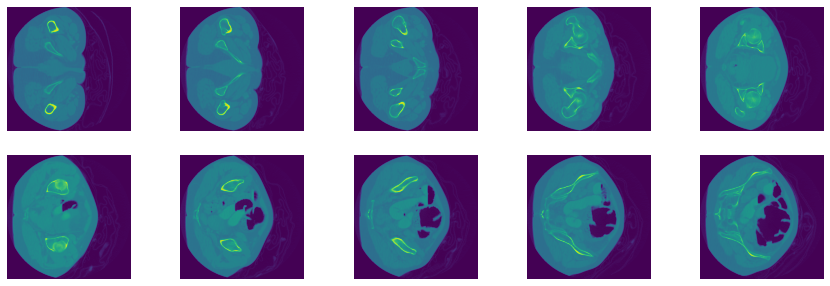

sample number 15: shape (512, 512, 137) 


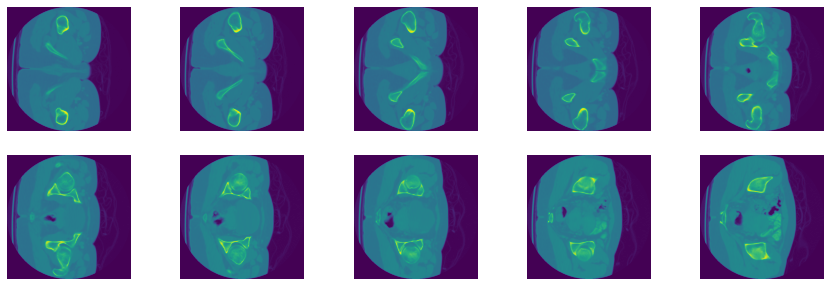

sample number 25: shape (512, 512, 91) 


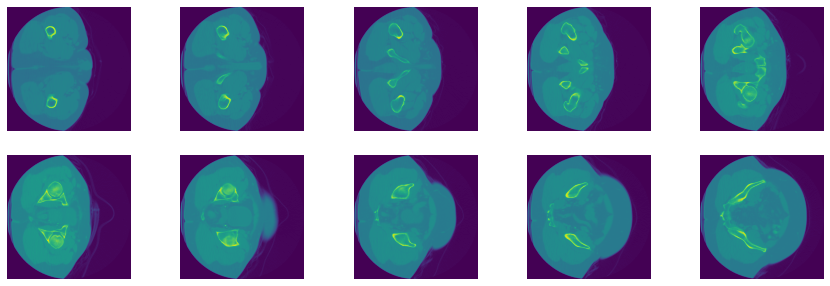

sample number 35: shape (512, 512, 41) 


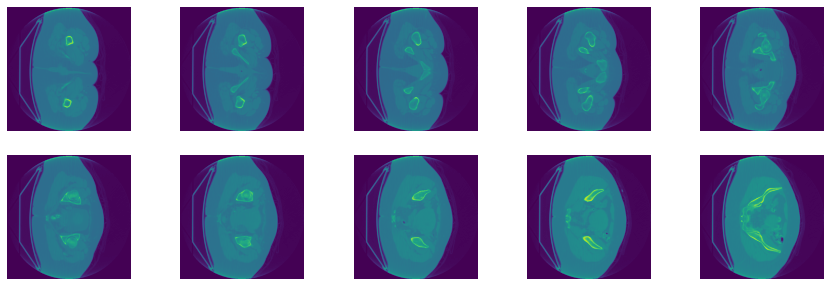

sample number 45: shape (512, 512, 153) 


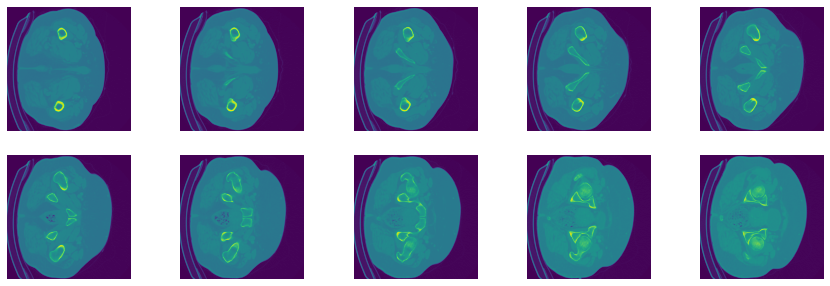

sample number 55: shape (512, 512, 98) 


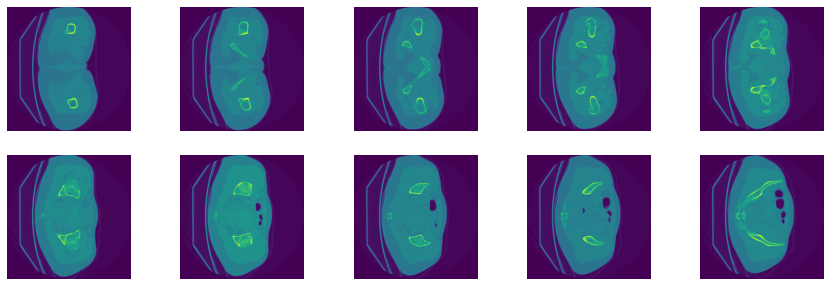

sample number 65: shape (512, 512, 86) 


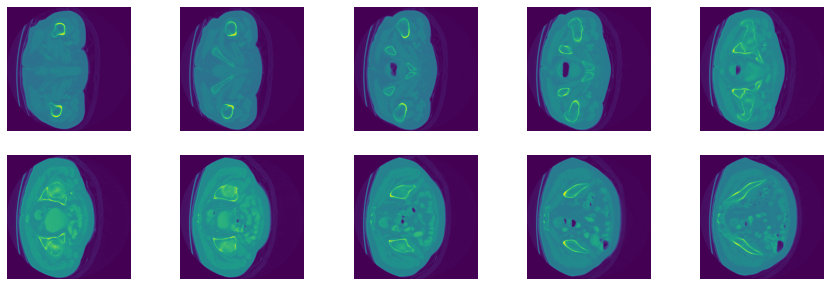

sample number 75: shape (512, 512, 124) 


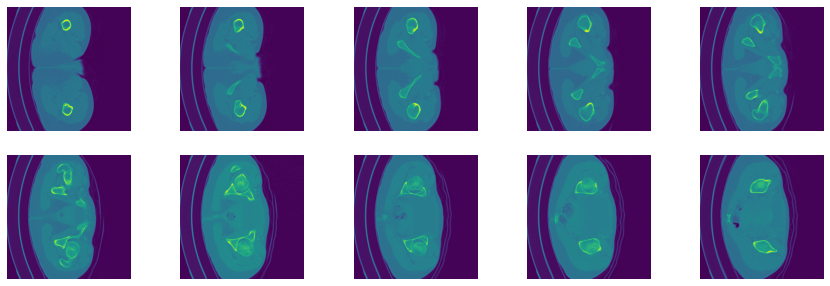

sample number 85: shape (512, 512, 38) 


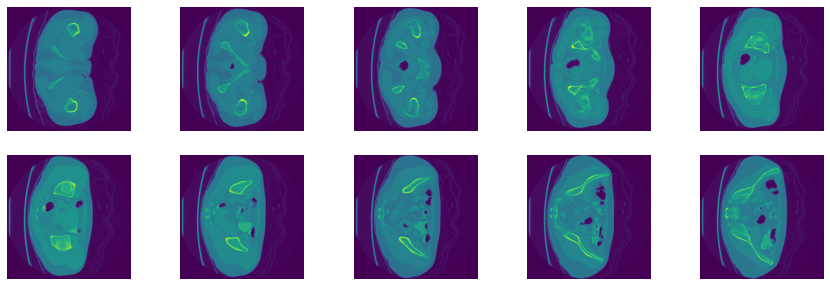

sample number 95: shape (512, 512, 53) 


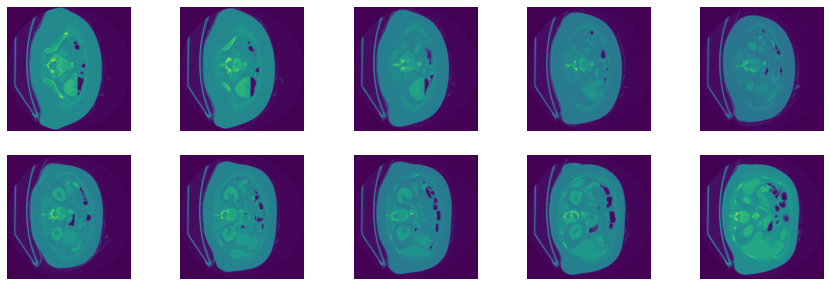

In [8]:
for sample_num in range(5,len(imgs),10):
    sample = imgs[sample_num]
    print("sample number {}: shape {} ".format(str(sample_num), sample.shape))

    plt.figure(figsize=(15, 5)) 
    for i in range(10):
        plt.subplot(2, 5, 1+i)
        plt.imshow(sample[ :, :,3*i])
        plt.axis('off')

    plt.show()

### Plotting some Labels (Masks)

Display some masks

Mask number 5: shape (512, 512, 93) 


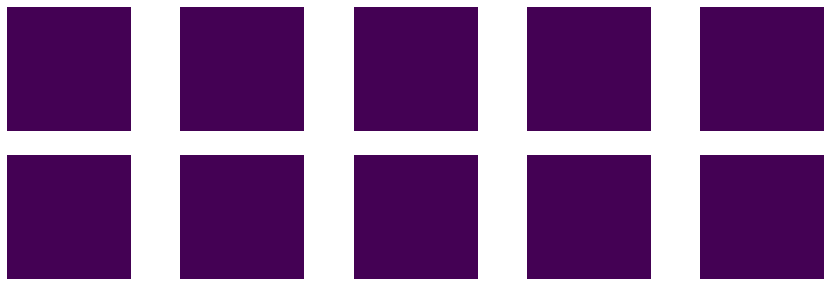

Mask number 15: shape (512, 512, 137) 


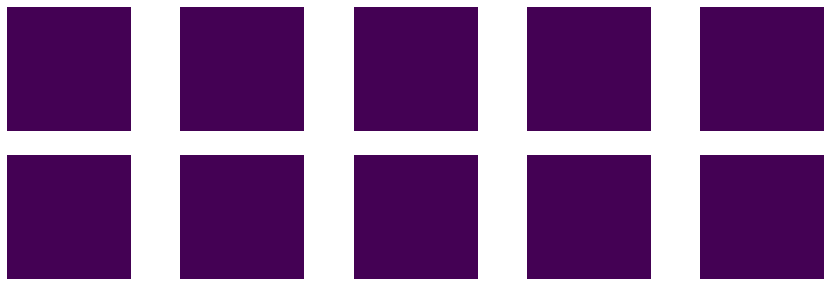

Mask number 25: shape (512, 512, 91) 


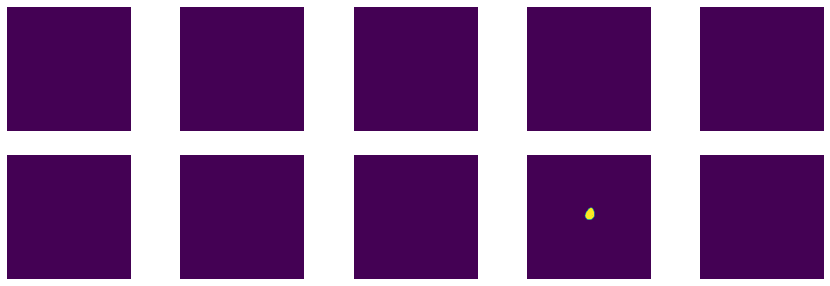

Mask number 35: shape (512, 512, 41) 


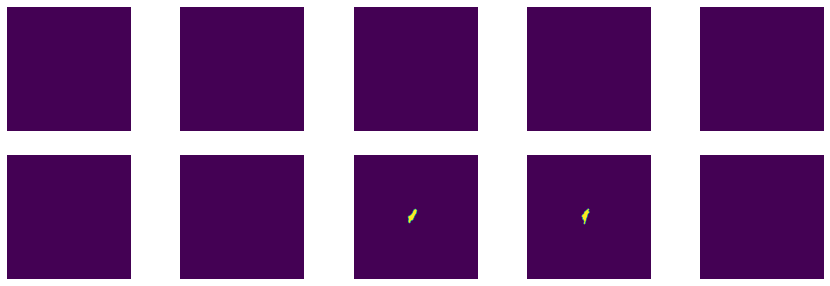

Mask number 45: shape (512, 512, 153) 


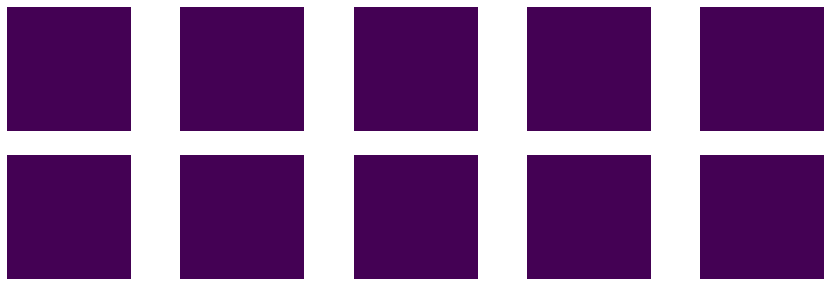

Mask number 55: shape (512, 512, 98) 


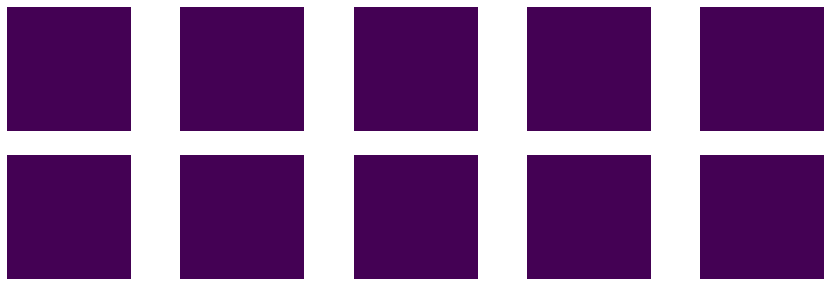

Mask number 65: shape (512, 512, 86) 


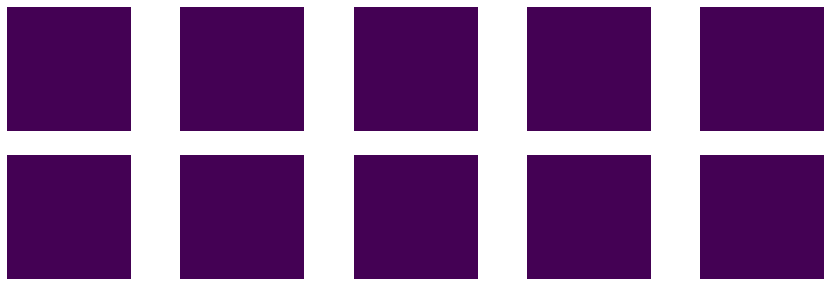

Mask number 75: shape (512, 512, 124) 


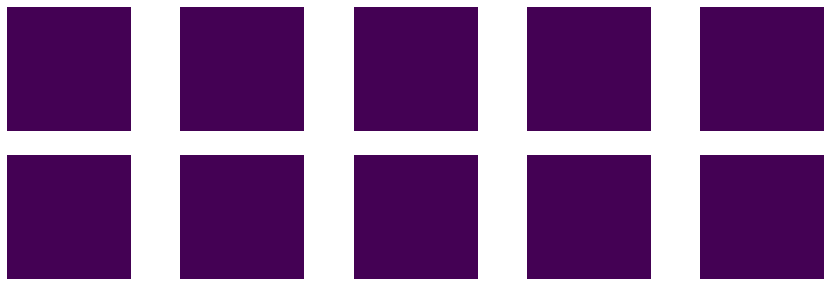

Mask number 85: shape (512, 512, 38) 


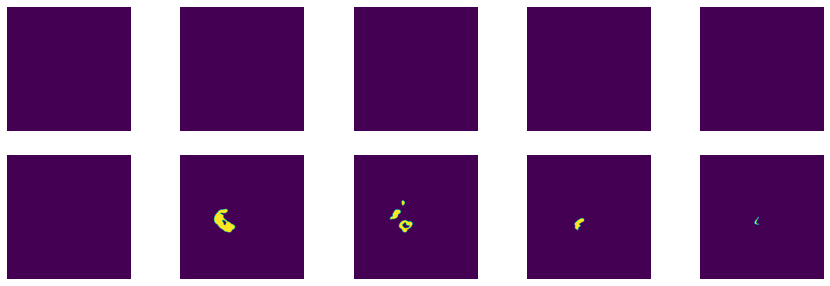

Mask number 95: shape (512, 512, 53) 


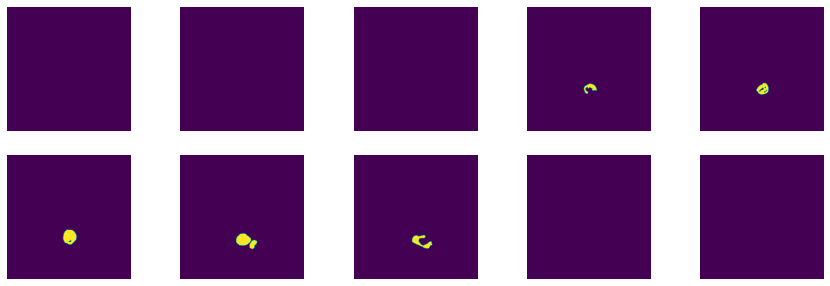

In [9]:
for sample_num in range(5,len(imgs),10):
    sample = lbls[sample_num]
    print("Mask number {}: shape {} ".format(str(sample_num), sample.shape))

    plt.figure(figsize=(15, 5)) 
    for i in range(10):
        plt.subplot(2, 5, 1+i)
        plt.imshow(sample[ :, :,3*i])
        plt.axis('off')

    plt.show()

### Determine Class (im)balance

Use function from pytorch_unet.ipynb notebook to convert images and labels (masks)

In [10]:
def convert_depth_to_imgs(images, neighbors=1):
    out_imgs = []
    for img in tqdm(images):
        for i in range(img.shape[2]):
            out_imgs.append(img[:,:,i].reshape((1,img.shape[0], img.shape[1])))

    print("Data shape single img: ", out_imgs[0].shape)
    return out_imgs

In [11]:
train_imgs = convert_depth_to_imgs(imgs)

  0%|          | 0/100 [00:00<?, ?it/s]

Data shape single img:  (1, 512, 512)


In [12]:
train_lbls = convert_depth_to_imgs(lbls)

  0%|          | 0/100 [00:00<?, ?it/s]

Data shape single img:  (1, 512, 512)


Determine share of images with cancer segmentation mask

In [13]:
no_cancer_pix = [np.sum(lbl) for lbl in train_lbls]
pos_cancer_pix = [t for t in no_cancer_pix if t>0]

print('Share of images with cancer: {:.2%}'.format(len(pos_cancer_pix)/len(no_cancer_pix)))

Share of images with cancer: 10.18%


Histogram of size of "cancer mask" over all images that have one

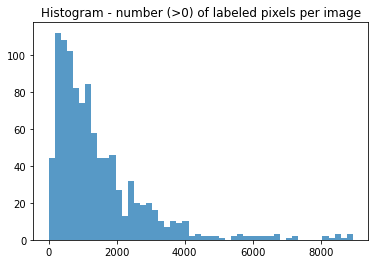

In [14]:
plt.hist(pos_cancer_pix, bins=50, alpha=0.75)
plt.title("Histogram - number (>0) of labeled pixels per image")
plt.show()

### Overlay some masks onto images

Plot some scans overlaid by masks

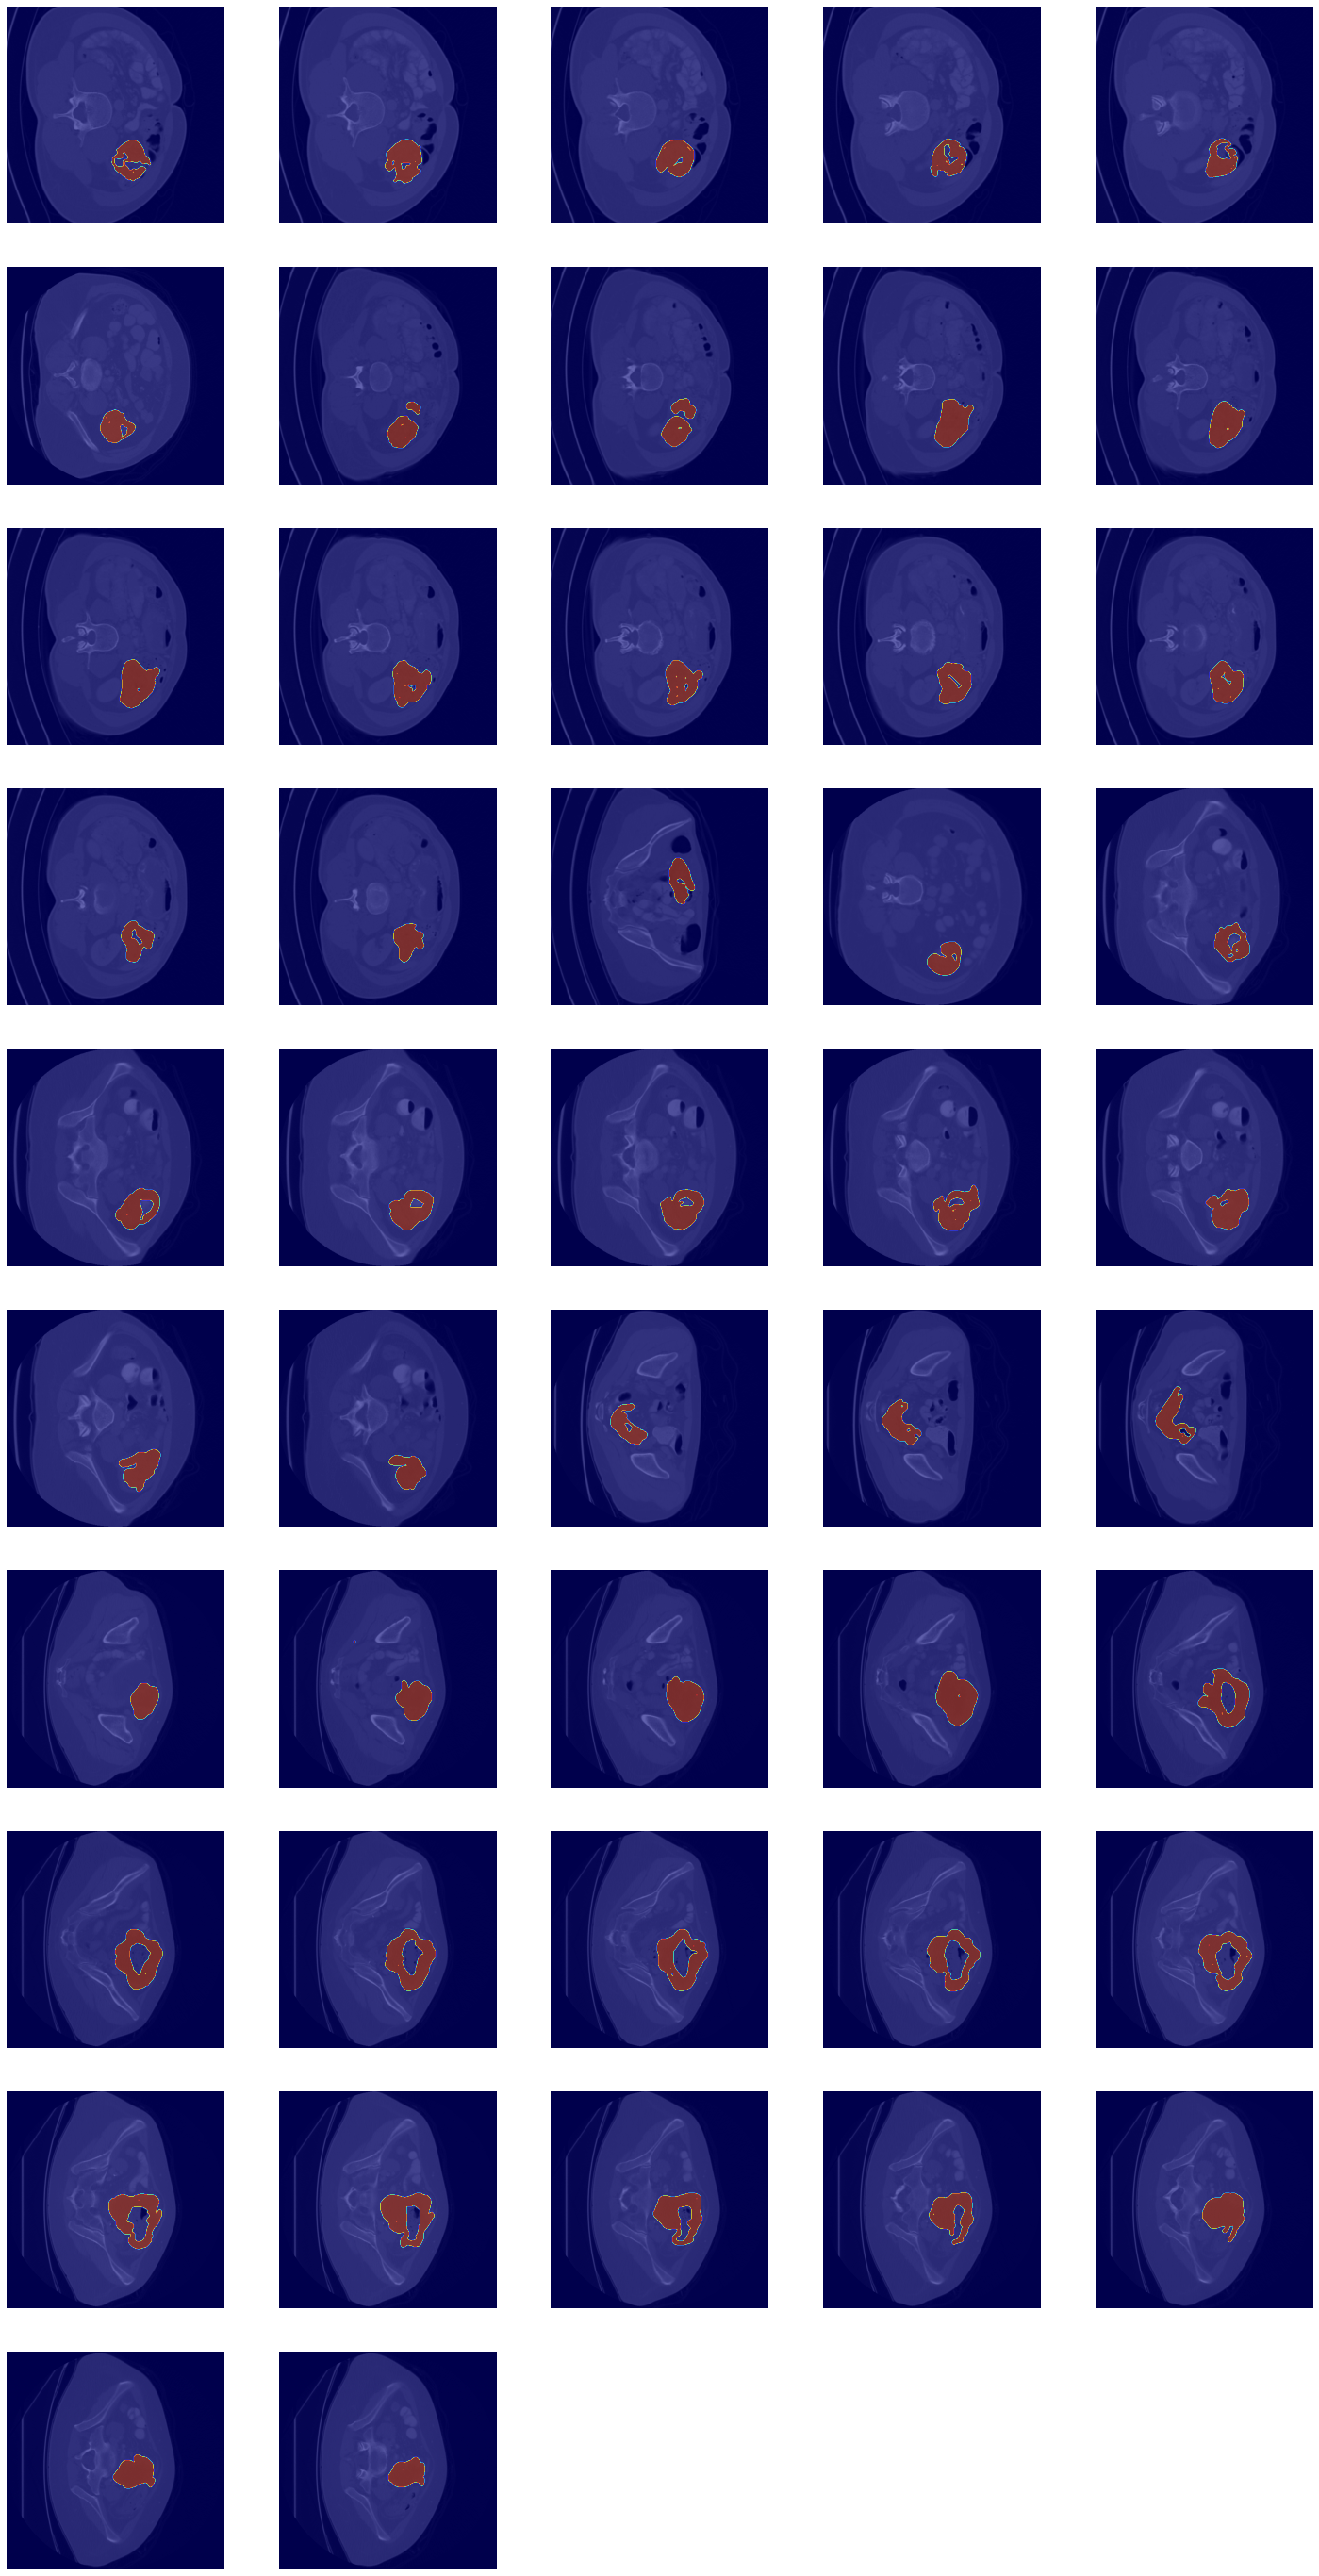

In [15]:
treshold = 4000 # threshold for mask size
index_pos = [idx for idx, label in enumerate(no_cancer_pix) if np.sum(label) > treshold]

plt.figure(figsize=(25, 50)) 

for n, index in enumerate(index_pos):
    plt.subplot(10, 5, 1+n)
    plt.imshow(train_imgs[index][0,:,:], cmap='gray')
    plt.imshow(train_lbls[index][0,:,:], cmap='jet', alpha=0.6)
    plt.axis('off')

plt.show()

### Heatmap of segmentation mask

<AxesSubplot:>

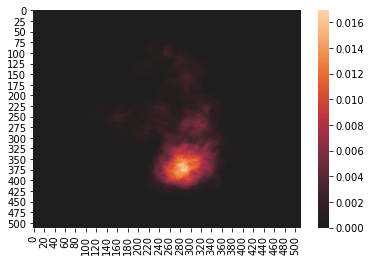

In [16]:
mean_lbl = np.mean(train_lbls, axis=0)
sns.heatmap(mean_lbl[0,:,:], center=0)

### Analyse Voxel-sizes

In [17]:
files_Tr = [f for f in os.listdir(os.path.join(data_path, 'imagesTr')) if not ('.DS_Store' in f or '._' in f)]
files_Ts = [f for f in os.listdir(os.path.join(data_path, 'imagesTs')) if not ('.DS_Store' in f or '._' in f)]

In [22]:
from joblib import Parallel, delayed, parallel_backend

n_jobs = 1 # change for parallel processing
head_img_Tr_dct = Parallel(n_jobs=n_jobs)(delayed(scan_vox_size)(data_path, 'imagesTr', f) for f in tqdm(files_Tr))
head_img_Ts_dct = Parallel(n_jobs=n_jobs)(delayed(scan_vox_size)(data_path, 'imagesTs', f) for f in tqdm(files_Ts))
head_lbl_Tr_dct = Parallel(n_jobs=n_jobs)(delayed(scan_vox_size)(data_path, 'labelsTr', f) for f in tqdm(files_Tr))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [23]:
from collections import ChainMap

head_img_Tr_dct = dict(ChainMap(*head_img_Tr_dct))
head_img_Ts_dct = dict(ChainMap(*head_img_Ts_dct))
head_lbl_Tr_dct = dict(ChainMap(*head_lbl_Tr_dct))

In [24]:
head_img_Tr = np.asarray(list(head_img_Tr_dct.values()))
head_img_Ts = np.asarray(list(head_img_Ts_dct.values()))
head_lbl_Tr = np.asarray(list(head_lbl_Tr_dct.values()))
head_img_Tr = np.c_[head_img_Tr, head_img_Tr[:,0]*head_img_Tr[:,3], head_img_Tr[:,1]*head_img_Tr[:,4], head_img_Tr[:,2]*head_img_Tr[:,5]]
head_img_Ts = np.c_[head_img_Ts, head_img_Ts[:,0]*head_img_Ts[:,3], head_img_Ts[:,1]*head_img_Ts[:,4], head_img_Ts[:,2]*head_img_Ts[:,5]]
head_lbl_Tr = np.c_[head_lbl_Tr, head_lbl_Tr[:,0]*head_lbl_Tr[:,3], head_lbl_Tr[:,1]*head_lbl_Tr[:,4], head_lbl_Tr[:,2]*head_lbl_Tr[:,5]]

#### Check consistency

In [25]:
# pixel shapes are squares and consistent between labels and images
print(all(head_img_Tr[:,3] == head_img_Tr[:,4]))
print(all(head_img_Ts[:,3] == head_img_Ts[:,4]))
print(all(head_lbl_Tr[:,3] == head_img_Tr[:,3]))

True
True
True


#### Depths in mm of the scans

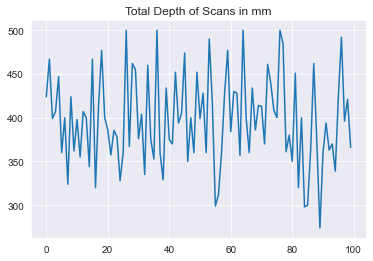

In [26]:
sns.set_style("darkgrid")
sns.lineplot(x = range(len(head_img_Tr)), y = head_img_Tr[:,6]).set_title("Total Depth of Scans in mm")
plt.show()

#### Distribution of real word dimensions in mm

Training - mean x-dimension: 397.32
Training - mean y-dimension: 397.32
Training - mean z-dimension: 437.86
Testing - mean x-dimension: 411.41
Testing - mean y-dimension: 411.41
Testing - mean z-dimension: 481.05


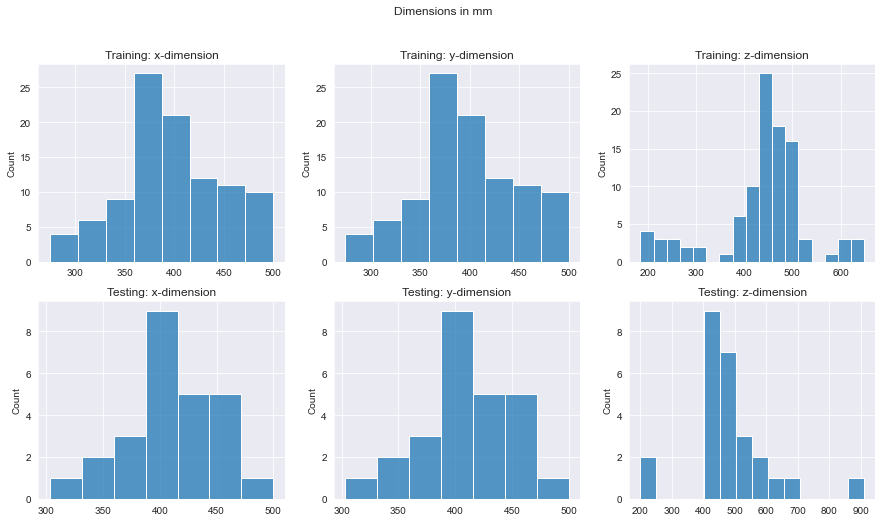

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Dimensions in mm')

sns.histplot(ax=axes[0,0], data=head_img_Tr[:,6])
axes[0,0].set_title("Training: x-dimension")
sns.histplot(ax=axes[0,1], data=head_img_Tr[:,7])
axes[0,1].set_title("Training: y-dimension")
sns.histplot(ax=axes[0,2], data=head_img_Tr[:,8])
axes[0,2].set_title("Training: z-dimension")

sns.histplot(ax=axes[1,0], data=head_img_Ts[:,6])
axes[1,0].set_title("Testing: x-dimension")
sns.histplot(ax=axes[1,1], data=head_img_Ts[:,7])
axes[1,1].set_title("Testing: y-dimension")
sns.histplot(ax=axes[1,2], data=head_img_Ts[:,8])
axes[1,2].set_title("Testing: z-dimension")

print("Training - mean x-dimension: {0:.2f}".format(np.mean(head_img_Tr[:,6])))
print("Training - mean y-dimension: {0:.2f}".format(np.mean(head_img_Tr[:,7])))
print("Training - mean z-dimension: {0:.2f}".format(np.mean(head_img_Tr[:,8])))
print("Testing - mean x-dimension: {0:.2f}".format(np.mean(head_img_Ts[:,6])))
print("Testing - mean y-dimension: {0:.2f}".format(np.mean(head_img_Ts[:,7])))
print("Testing - mean z-dimension: {0:.2f}".format(np.mean(head_img_Ts[:,8])))

#### Distribution of pixel size resp. voxel depth

Mean pixel size training data: 0.78
Mean voxel depth training data: 4.58
Mean pixel size testing data: 0.80
Mean voxel depth testing data: 4.64
Mode pixel size training data: 0.70
Mode voxel depth training data: 5.00
Mode pixel size testing data: 0.78
Mode voxel depth testing data: 5.00


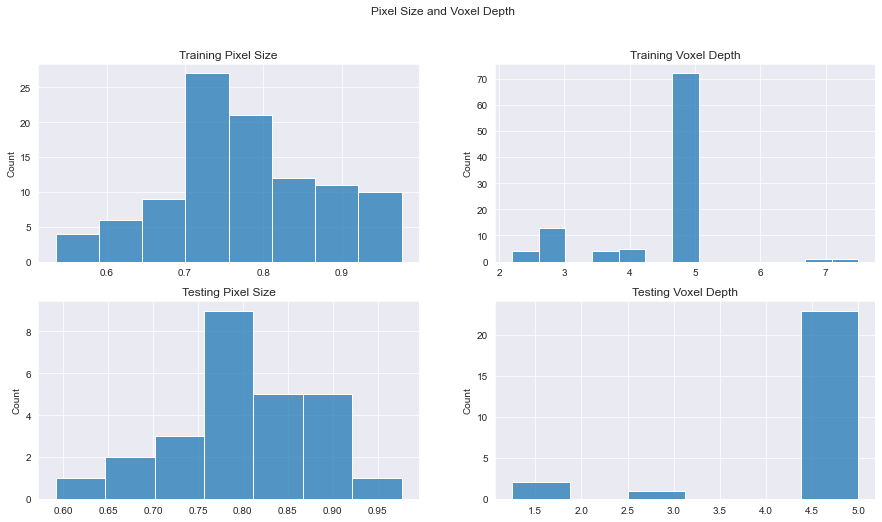

In [29]:
from scipy.stats import mode

fig, axes = plt.subplots(2, 2, figsize=(15, 8))
fig.suptitle('Pixel Size and Voxel Depth')

sns.histplot(ax=axes[0,0], data=head_img_Tr[:,3])
axes[0,0].set_title("Training Pixel Size")
sns.histplot(ax=axes[0,1], data=head_img_Tr[:,5])
axes[0,1].set_title("Training Voxel Depth")
sns.histplot(ax=axes[1,0], data=head_img_Ts[:,3])
axes[1,0].set_title("Testing Pixel Size")
sns.histplot(ax=axes[1,1], data=head_img_Ts[:,5])
axes[1,1].set_title("Testing Voxel Depth")

print("Mean pixel size training data: {0:.2f}".format(np.mean(head_img_Tr[:,3])))
print("Mean voxel depth training data: {0:.2f}".format(np.mean(head_img_Tr[:,5])))
print("Mean pixel size testing data: {0:.2f}".format(np.mean(head_img_Ts[:,3])))
print("Mean voxel depth testing data: {0:.2f}".format(np.mean(head_img_Ts[:,5])))
print("="*50)
print("Mode pixel size training data: {0:.2f}".format(mode(head_img_Tr[:,3])[0][0]))
print("Mode voxel depth training data: {0:.2f}".format(mode(head_img_Tr[:,5])[0][0]))
print("Mode pixel size testing data: {0:.2f}".format(mode(head_img_Ts[:,3])[0][0]))
print("Mode voxel depth testing data: {0:.2f}".format(mode(head_img_Ts[:,5])[0][0]))

### Observations

1. 2D images have the same dimension of 512x512
2. depth varies between 37 and 258 images for the training set
3. Dataset heavily imbalanced (only 10% with a segmentation mask)
4. Distribution of masks within image frame quite localized. Deviation mostly in the up-direction
5. Masks are disc-, ring- or U-shaped
6. Quite some variation of voxel sizes along the various scans: e.g. 0.6-0.9mm for pixel size and 2-7mm voxel depth (also most have a depth of 5mm) --> some normalization might be beneficial such that images have the same real world dimension